# 1. Install Dependencies and Setup

In [2]:
!pip install tensorflow opencv-python matplotlib

In [3]:
!pip list

Package                      Version
---------------------------- ------------
absl-py                      1.4.0
anyio                        4.0.0
appnope                      0.1.3
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asgiref                      3.7.2
asttokens                    2.4.0
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.12.1
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.0.0
cachetools                   5.3.1
certifi                      2022.12.7
cffi                         1.15.1
charset-normalizer           2.1.1
comm                         0.1.4
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.6.7.post1
decorator                    5.1.1
defusedxml                   0.7.1
distlib                      

In [4]:
import tensorflow as tf
import os

2023-09-07 16:36:13.986377: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

<h4>Load data<h4>

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 19006 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

In [11]:
# class 0 = aegyopitus
# class 1 = albopictus
batch[1]

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int32)

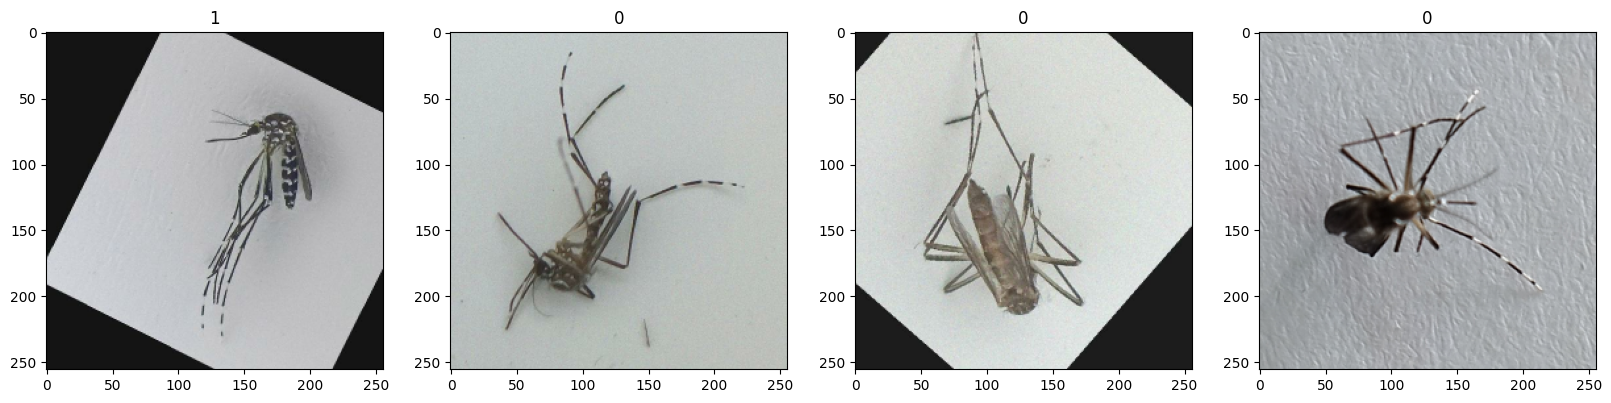

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
scaled = batch[0]/250

<h6>Processing data</h6>

<h4>Scale data</h4>

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
scaled_iterator = data.as_numpy_iterator()

In [16]:
batch = scaled_iterator.next()

<h4>Split data</h4>

In [17]:
len(data)

594

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

<h4>Build deep learning model</h4>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

<h4>Train</h4>

In [25]:
logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
415/415 [==============================] - 422s 1s/step - loss: 0.7017 - accuracy: 0.5312 - val_loss: 0.6863 - val_accuracy: 0.5470
Epoch 2/20
415/415 [==============================] - 391s 940ms/step - loss: 0.6896 - accuracy: 0.5322 - val_loss: 0.6874 - val_accuracy: 0.5389
Epoch 3/20
415/415 [==============================] - 392s 942ms/step - loss: 0.6834 - accuracy: 0.5510 - val_loss: 0.6856 - val_accuracy: 0.5478
Epoch 4/20
415/415 [==============================] - 398s 957ms/step - loss: 0.6576 - accuracy: 0.6084 - val_loss: 0.6305 - val_accuracy: 0.6308
Epoch 5/20
415/415 [==============================] - 424s 1s/step - loss: 0.4997 - accuracy: 0.7604 - val_loss: 0.4344 - val_accuracy: 0.8093
Epoch 6/20
415/415 [==============================] - 411s 988ms/step - loss: 0.3293 - accuracy: 0.8611 - val_loss: 0.3902 - val_accuracy: 0.8459
Epoch 7/20
415/415 [==============================] - 410s 987ms/step - loss: 0.2009 - accuracy: 0.9200 - val_loss: 0.4128 - val_a

<h4>Plot performance</h4>

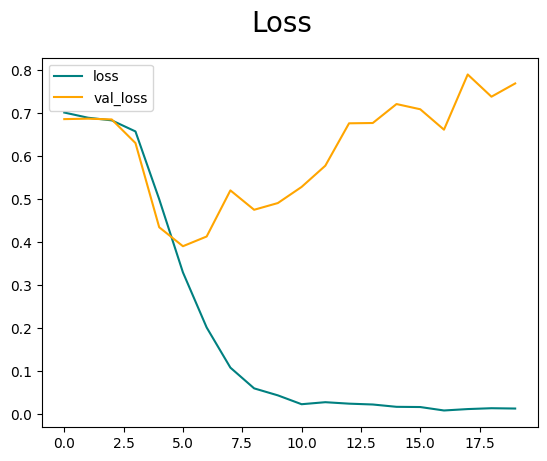

In [30]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

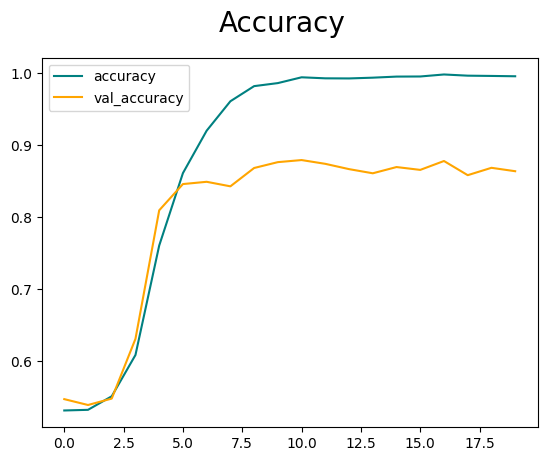

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

<h6>Evaluate performance</h6>

In [34]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [35]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [36]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 749ms/step


In [37]:
print(pre.result(), re.result(), acc.result()) 

tf.Tensor(0.8668981, shape=(), dtype=float32) tf.Tensor(0.8221734, shape=(), dtype=float32) tf.Tensor(0.8555787, shape=(), dtype=float32)


<h6>Test</h6>

In [38]:
import cv2

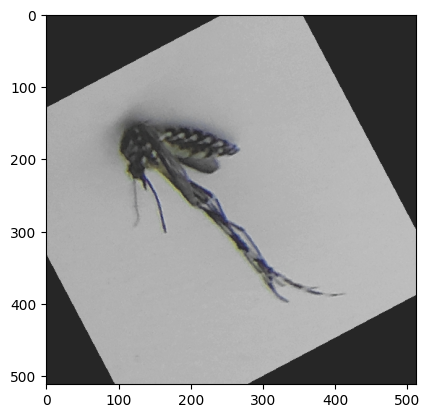

In [40]:
img = cv2.imread('Ae_aegypti_test.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

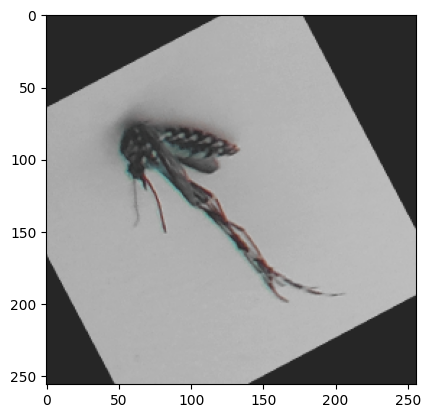

In [45]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [42]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 99ms/step


In [46]:
yhat

array([[0.19728081]], dtype=float32)

In [47]:
if yhat > 0.5: 
    print(f'Predicted class is albopictus')
else:
    print(f'Predicted class is aegypti')

Predicted class is aegypti


<h6>Save the Model</h6>

In [48]:
from tensorflow.keras.models import load_model

In [51]:
model.save(os.path.join('models','insectmodel.h5'))

In [55]:
new_model = load_model(os.path.join('models', 'insectmodel.h5'))

In [58]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 48ms/step


In [60]:
if yhatnew > 0.5: 
    print(f'Predicted class is Chikungunya')
else:
    print(f'Predicted class is Dengue')

Predicted class is Dengue
